In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Binarizer, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [4]:
# Load the data
mcdonalds = pd.read_csv("/content/mcdonalds.csv")

In [5]:
# Display the first 3 rows of the dataframe
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
# Check column names
print(mcdonalds.columns.tolist())

# Check the dimensions of the dataframe
print(mcdonalds.shape)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)


In [8]:
# Convert to binary matrix (1 for 'Yes', 0 for 'No')
MD_x = mcdonalds.iloc[:, 0:11]
MD_x_binary = (MD_x == "Yes").astype(int)

In [9]:
# Calculate and round the column means
column_means = MD_x_binary.mean().round(2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [10]:
# Perform Principal Component Analysis (PCA)
pca = PCA()
MD_pca = pca.fit_transform(MD_x_binary)

In [11]:
# Print the summary of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

In [12]:
print("Standard deviation of principal components:",pca.singular_values_)

Standard deviation of principal components: [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]


In [13]:
print("Proportion of Variance:",explained_variance)

Proportion of Variance: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [14]:
print("Cumulative Proportion:",cumulative_explained_variance)

Cumulative Proportion: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [15]:
print("Factor loadings (first 2 components):")
loadings = pca.components_.T
print(pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=MD_x_binary.columns).round(1))

Factor loadings (first 2 components):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy      -0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.0  0.6  -0.1   0.0
convenient -0.2  0.0 -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.0  -0.7  -0.5
spicy      -0.0  0.0 -0.0  0.2  0.1 -0.4  0.7  0.4  0.4  -0.1   0.1
fattening   0.1 -0.0 -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2  -0.0   0.3
greasy      0.3 -0.1 -0.8  0.3  0.4  0.2  0.0 -0.1 -0.0   0.0   0.0
fast       -0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2   0.2   0.3
cheap      -0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.0  0.1  0.1   0.4  -0.5
tasty      -0.5  0.3 -0.3 -0.0 -0.2 -0.1  0.4 -0.1 -0.6   0.1   0.0
expensive   0.3  0.6  0.0  0.1 -0.0 -0.3 -0.1  0.0  0.1   0.5  -0.5
healthy    -0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2  -0.0   0.2
disgusting  0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.0 -0.2 -0.1  -0.3  -0.0


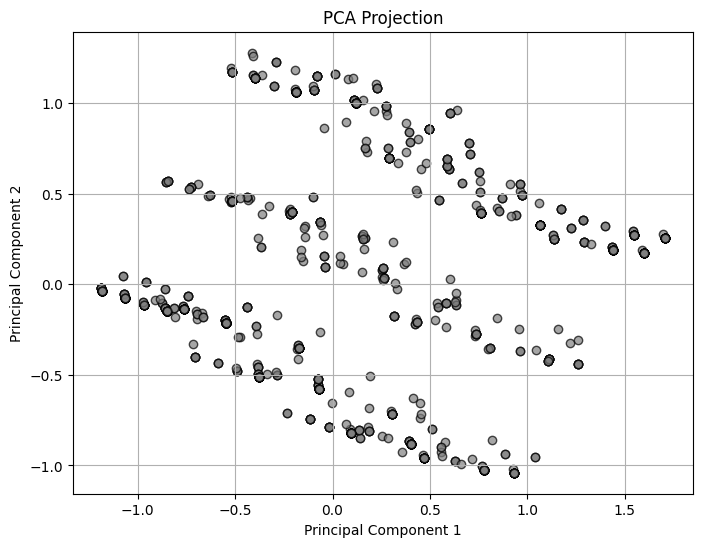

In [16]:
# Plot the PCA projections
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid(True)
plt.show()

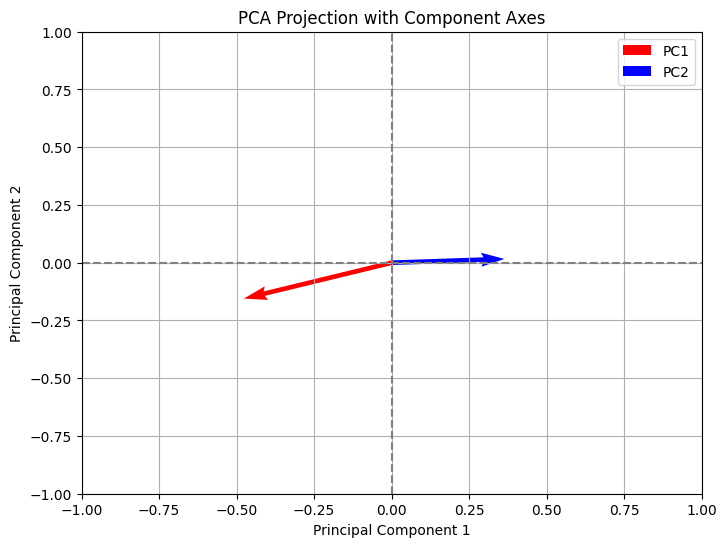

In [17]:
# To simulate projAxes functionality, plotting the PCA components as vectors
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='PC1')
plt.quiver(0, 0, pca.components_[1, 0], pca.components_[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label='PC2')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Component Axes')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Define range of clusters
cluster_range = range(2, 9)  # 2 to 8 clusters
inertia = []

# Perform k-means clustering for different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(MD_x_binary)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [19]:
# Perform k-means clustering with a specified number of clusters
n_clusters = 3  # Choose a number of clusters, e.g., 3
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
kmeans.fit(MD_x_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1234)

In [20]:
# Relabel clusters to start from 0
def relabel_clusters(labels):
    le = LabelEncoder()
    return le.fit_transform(labels)

In [21]:
# Apply relabeling
relabelled_labels = relabel_clusters(kmeans.labels_)
# Add the cluster labels to the original dataframe
mcdonalds['Cluster'] = relabelled_labels
# Display the first few rows of the dataframe with cluster labels
print(mcdonalds.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Cluster  
0         No   -3   61  Every three months  Female        2  
1         No   +2   51  Every three months  Female        1  
2         No   +1   62  Every three months  Female        1  
3        Yes   +4   69         Once a week  Female        0  
4         No   +2   49        Once a month    Male        2  


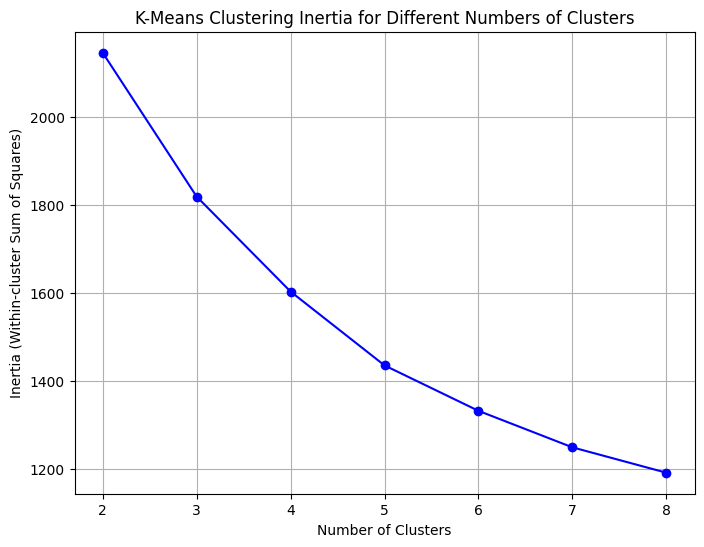

In [22]:
# Plot the inertia for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('K-Means Clustering Inertia for Different Numbers of Clusters')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [23]:
# Function to perform Gaussian Mixture Model clustering and return results
def fit_gmm_models(X, cluster_range, nrep):
    models = {}
    for n_clusters in cluster_range:
        models[n_clusters] = []
        for _ in range(nrep):
            gmm = GaussianMixture(n_components=n_clusters, random_state=1234)
            gmm.fit(X)
            models[n_clusters].append(gmm)
    return models

In [24]:
# Perform clustering with different numbers of clusters (2 to 8)
cluster_range = range(2, 9)
nrep = 10
gmm_models = fit_gmm_models(MD_x_binary, cluster_range, nrep)

# Example to display one of the GMM models
n_clusters_example = 4
example_gmm = gmm_models[n_clusters_example][0]

# Print the model parameters
print(f"Gaussian Mixture Model with {n_clusters_example} clusters:")
print("Means:")
print(example_gmm.means_)
print("Covariances:")
print(example_gmm.covariances_)
print("Weights:")
print(example_gmm.weights_)

Gaussian Mixture Model with 4 clusters:
Means:
[[0.80837357 1.         0.09017704 0.82447663 0.42028979 0.95974246
  0.88888889 1.         0.         0.28502409 0.07246368]
 [0.         0.72047244 0.10629921 0.92125984 0.68897638 0.76377953
  0.09055118 0.22440945 1.         0.06692913 0.59055118]
 [0.         0.84837545 0.06498195 0.89530686 0.59205776 0.91696751
  0.83032491 0.01805054 0.         0.08303249 0.433213  ]
 [1.         0.93023258 0.11627925 0.88372096 0.54817286 0.8770762
  0.21594701 0.8405316  0.88372071 0.23920281 0.12624602]]
Covariances:
[[[ 1.54906742e-01  0.00000000e+00 -5.26398083e-03 -7.87001870e-03
   -1.28591239e-02  3.37122623e-04  1.09142975e-02  0.00000000e+00
    0.00000000e+00  2.56326382e-02 -1.50995550e-02]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-5.26398083e-03  0.00000000e+00  8.20461451e-02 -6.71610733e-

In [25]:
# Predict clusters for the original data with the example model
labels = example_gmm.predict(MD_x_binary)

In [26]:
# Relabel clusters to start from 0
def relabel_clusters(labels):
    le = LabelEncoder()
    return le.fit_transform(labels)

# Apply relabeling
relabelled_labels = relabel_clusters(labels)

# Add the cluster labels to the original dataframe
mcdonalds['Cluster'] = relabelled_labels

# Display the first few rows of the dataframe with cluster labels
print(mcdonalds.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Cluster  
0         No   -3   61  Every three months  Female        1  
1         No   +2   51  Every three months  Female        3  
2         No   +1   62  Every three months  Female        1  
3        Yes   +4   69         Once a week  Female        0  
4         No   +2   49        Once a month    Male        2  


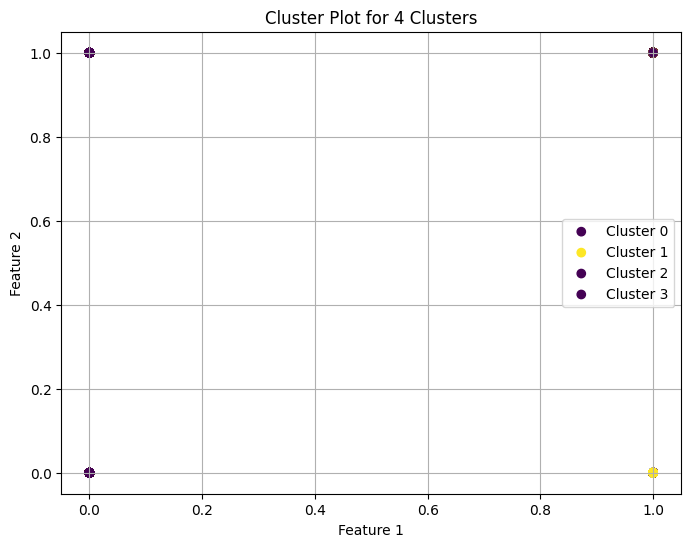

In [27]:
# Plot the cluster means for a specific number of clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters_example):
    plt.scatter(MD_x_binary.iloc[:, 0], MD_x_binary.iloc[:, 1], c=(relabelled_labels == i).astype(int), label=f'Cluster {i}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Cluster Plot for {n_clusters_example} Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Profiling Segments
numeric_data = mcdonalds.select_dtypes(include=[np.number])  # Ensure we only use numeric data
segment_profiles = numeric_data.groupby('Cluster').mean()
print("Segment Profiles:")
print(segment_profiles)

# Describing Segments
segment_descriptions = numeric_data.groupby('Cluster').describe()
print("Segment Descriptions:")
print(segment_descriptions)


Segment Profiles:
               Age
Cluster           
0        43.570048
1        48.374016
2        49.357401
3        39.186047
Segment Descriptions:
           Age                                                     
         count       mean        std   min    25%   50%   75%   max
Cluster                                                            
0        621.0  43.570048  14.911903  18.0  31.00  43.0  57.0  71.0
1        254.0  48.374016  12.163489  18.0  40.25  49.5  58.0  70.0
2        277.0  49.357401  13.302993  19.0  38.00  53.0  60.0  70.0
3        301.0  39.186047  12.928725  18.0  29.00  37.0  49.0  70.0


Market Mix for Each Cluster:
               Age  Cluster
Cluster                    
0        43.570048      0.0
1        48.374016      1.0
2        49.357401      2.0
3        39.186047      3.0


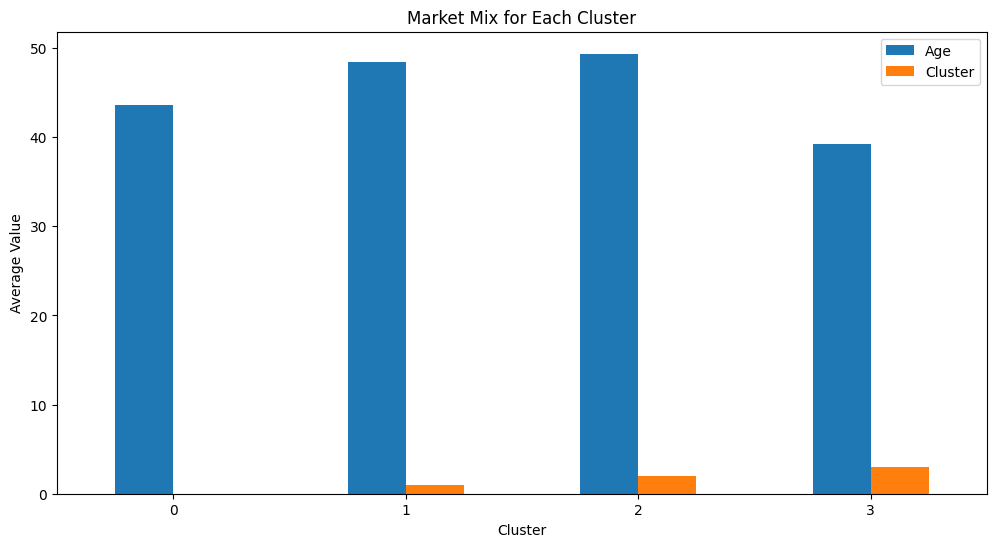

In [42]:
# prompt: mrket mix code

# Calculate the market mix for each cluster
numeric_columns = mcdonalds.select_dtypes(include=[np.number]).columns
market_mix = mcdonalds.groupby('Cluster')[numeric_columns].mean()

# Display the market mix
print("Market Mix for Each Cluster:")
print(market_mix)

# Visualize the market mix
market_mix.plot(kind='bar', figsize=(12, 6))
plt.title('Market Mix for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value') # More descriptive y-axis label
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


In [48]:
# Fit regression model for each cluster
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')  # 'coerce' will replace non-numeric values with NaN

regression_results = {}
formula = 'Like ~ ' + ' + '.join(MD_x.columns)
for cluster in np.unique(mcdonalds['Cluster']):
    cluster_data = mcdonalds[mcdonalds['Cluster'] == cluster]
    try:
      model = smf.ols(formula=formula, data=cluster_data).fit()
      regression_results[cluster] = model.summary()
    except Exception as e:
      print(f"Error fitting regression for cluster {cluster}: {e}")



In [49]:
# Display the regression results for each cluster
for cluster, result in regression_results.items():
    print(f"Cluster {cluster} Regression Summary:")
    print(result)


Cluster 0 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     24.67
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           3.48e-32
Time:                        09:28:06   Log-Likelihood:                -940.74
No. Observations:                 522   AIC:                             1899.
Df Residuals:                     513   BIC:                             1938.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

Silhouette Score: 0.23974583707555086
Calinski-Harabasz Score: 317.6984924069107


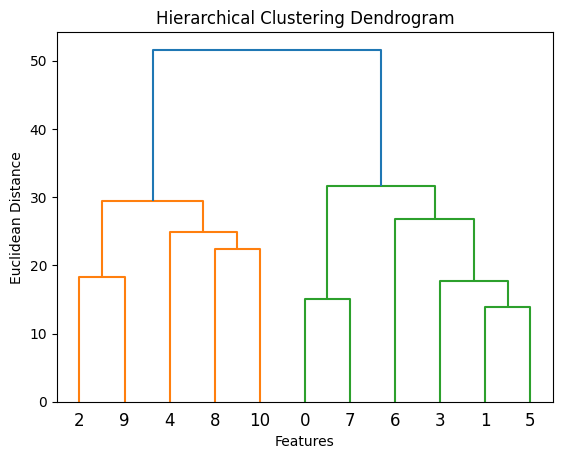

In [50]:
# Evaluation and Monitoring
# Calculate silhouette score for clustering
silhouette_avg = silhouette_score(MD_x_binary, relabelled_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Calinski-Harabasz score for clustering
calinski_harabasz_avg = calinski_harabasz_score(MD_x_binary, relabelled_labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")

# Hierarchical clustering and ordering
order = sch.linkage(MD_x_binary.T, method='ward')
dendrogram = sch.dendrogram(order)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()